In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("train.csv") #loading train dataset into dataframe

In [4]:
X_test=pd.read_csv("test.csv")#loading test dataset into dataframe

In [5]:
df.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [6]:
df.shape

(47803, 37)

In [7]:
df.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

In [8]:
columns=[ 'dob_year', 'dob_month','animal_type', 'intake_condition', 'intake_type','sex_upon_intake', 'count', 'age_upon_intake_(days)','age_upon_intake_(years)','intake_month', 'intake_year', 'intake_hour', 'intake_number', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(days)','age_upon_outcome_(years)','outcome_month', 'outcome_year', 'outcome_hour','outcome_number', 'outcome_type']

In [9]:
 df=df.loc[:, columns]

In [10]:
df.head(10)

,dob_year,dob_month,animal_type,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,...,intake_number,time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,outcome_type
0,2007,7,Dog,Normal,Stray,Neutered Male,1,3650,10.0,12,...,1.0,0.588194,Neutered Male,3650,10.0,12,2017,0,1.0,Return to Owner
1,2007,7,Dog,Normal,Public Assist,Neutered Male,1,2555,7.0,12,...,2.0,1.259722,Neutered Male,2555,7.0,12,2014,16,2.0,Return to Owner
2,2007,7,Dog,Normal,Public Assist,Neutered Male,1,2190,6.0,3,...,3.0,1.113889,Neutered Male,2190,6.0,3,2014,17,3.0,Return to Owner
3,2004,4,Dog,Normal,Owner Surrender,Neutered Male,1,3650,10.0,4,...,1.0,4.970139,Neutered Male,3650,10.0,4,2014,15,1.0,Missing
4,1997,10,Dog,Injured,Public Assist,Neutered Male,1,5840,16.0,11,...,1.0,0.119444,Neutered Male,5840,16.0,11,2013,11,1.0,Return to Owner
5,1998,6,Dog,Aged,Stray,Spayed Female,1,5475,15.0,11,...,1.0,0.870833,Spayed Female,5475,15.0,11,2013,11,1.0,Return to Owner
6,1999,10,Dog,Normal,Stray,Intact Female,1,5475,15.0,11,...,1.0,0.178472,Intact Female,5475,15.0,11,2014,19,1.0,Return to Owner
7,1999,8,Dog,Normal,Stray,Neutered Male,1,5475,15.0,9,...,1.0,0.213194,Neutered Male,5475,15.0,9,2014,16,1.0,Return to Owner
8,1999,3,Dog,Normal,Public Assist,Neutered Male,1,5475,15.0,3,...,1.0,6.258333,Neutered Male,5475,15.0,3,2014,15,1.0,Return to Owner
9,1997,8,Dog,Normal,Stray,Spayed Female,1,6570,18.0,9,...,1.0,0.054167,Spayed Female,6570,18.0,9,2015,19,1.0,Return to Owner


In [11]:
df.columns

Index(['dob_year', 'dob_month', 'animal_type', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'intake_month', 'intake_year', 'intake_hour',
       'intake_number', 'time_in_shelter_days', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'outcome_month',
       'outcome_year', 'outcome_hour', 'outcome_number', 'outcome_type'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dob_year                  47803 non-null  int64  
 1   dob_month                 47803 non-null  int64  
 2   animal_type               47803 non-null  object 
 3   intake_condition          47803 non-null  object 
 4   intake_type               47803 non-null  object 
 5   sex_upon_intake           47802 non-null  object 
 6   count                     47803 non-null  int64  
 7   age_upon_intake_(days)    47803 non-null  int64  
 8   age_upon_intake_(years)   47803 non-null  float64
 9   intake_month              47803 non-null  int64  
 10  intake_year               47803 non-null  int64  
 11  intake_hour               47803 non-null  int64  
 12  intake_number             47803 non-null  float64
 13  time_in_shelter_days      47803 non-null  float64
 14  sex_up

In [13]:
df.isnull().sum()#checking whether dataset has null values and getting count of null values if any

dob_year                    0
dob_month                   0
animal_type                 0
intake_condition            0
intake_type                 0
sex_upon_intake             1
count                       0
age_upon_intake_(days)      0
age_upon_intake_(years)     0
intake_month                0
intake_year                 0
intake_hour                 0
intake_number               0
time_in_shelter_days        0
sex_upon_outcome            1
age_upon_outcome_(days)     0
age_upon_outcome_(years)    0
outcome_month               0
outcome_year                0
outcome_hour                0
outcome_number              0
outcome_type                0
dtype: int64

In [14]:
df=df.dropna()#dropped null value

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47802 entries, 0 to 47802
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dob_year                  47802 non-null  int64  
 1   dob_month                 47802 non-null  int64  
 2   animal_type               47802 non-null  object 
 3   intake_condition          47802 non-null  object 
 4   intake_type               47802 non-null  object 
 5   sex_upon_intake           47802 non-null  object 
 6   count                     47802 non-null  int64  
 7   age_upon_intake_(days)    47802 non-null  int64  
 8   age_upon_intake_(years)   47802 non-null  float64
 9   intake_month              47802 non-null  int64  
 10  intake_year               47802 non-null  int64  
 11  intake_hour               47802 non-null  int64  
 12  intake_number             47802 non-null  float64
 13  time_in_shelter_days      47802 non-null  float64
 14  sex_up

In [16]:
df.isnull().sum()#checking whether dataset has null values and getting count of null values if any

dob_year                    0
dob_month                   0
animal_type                 0
intake_condition            0
intake_type                 0
sex_upon_intake             0
count                       0
age_upon_intake_(days)      0
age_upon_intake_(years)     0
intake_month                0
intake_year                 0
intake_hour                 0
intake_number               0
time_in_shelter_days        0
sex_upon_outcome            0
age_upon_outcome_(days)     0
age_upon_outcome_(years)    0
outcome_month               0
outcome_year                0
outcome_hour                0
outcome_number              0
outcome_type                0
dtype: int64

No Null values found

In [17]:
#statistical Analysis
df.describe()

,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number
count,47802.000000,47802.000000,47802.0,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000,47802.000000
mean,2012.197858,6.337434,1.0,841.644073,2.305874,6.596021,2014.600079,13.549098,1.144555,17.143513,855.284172,2.343244,6.650496,2014.638927,14.381511,1.144555
std,3.068156,3.342005,0.0,1100.541565,3.015182,3.460149,0.905711,3.179429,0.500060,46.601203,1103.582758,3.023514,3.490242,0.912684,3.456173,0.500060
min,1992.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000694,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,2011.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.049479,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000
50%,2013.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.971875,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000
75%,2014.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2015.000000,16.000000,1.000000,13.113889,1095.000000,3.000000,10.000000,2015.000000,17.000000,1.000000
max,2016.000000,12.000000,1.0,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000


# Univariate Analysis

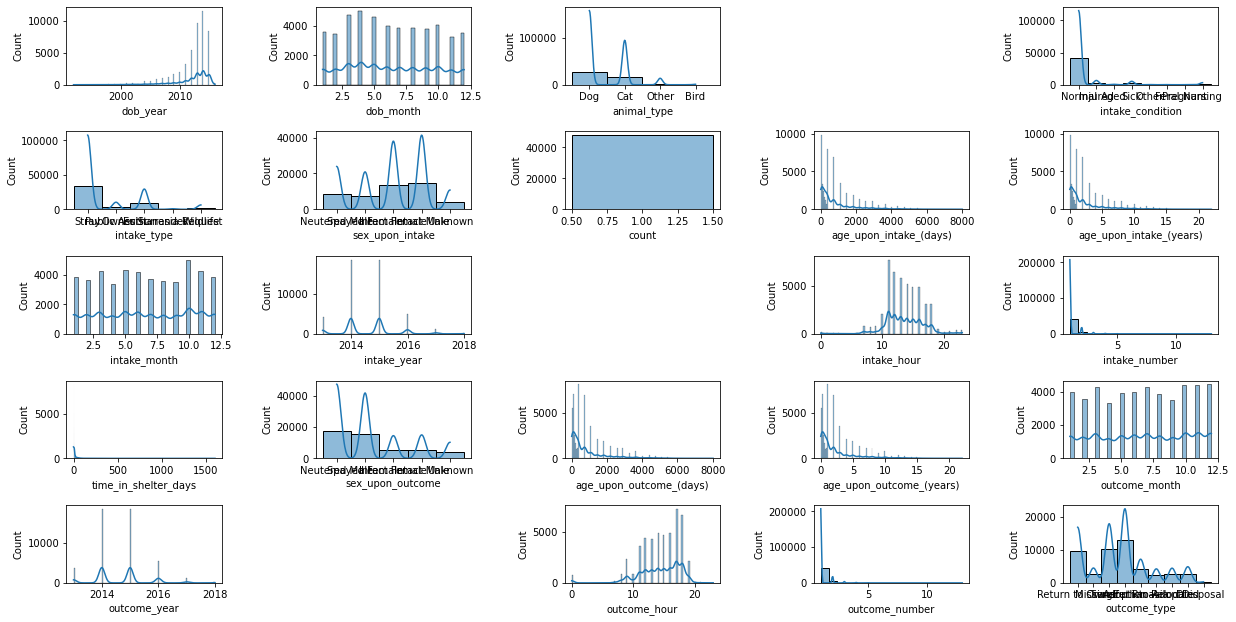

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(5,5,1)
sns.histplot(df,x='dob_year',kde=True)
plt.subplot(5,5,2)
sns.histplot(df,x='dob_month',kde=True )
plt.subplot(5,5,3)
sns.histplot(df,x='animal_type' ,kde=True )
#plt.subplot(5,5,4)
#sns.histplot(df,x='breed' ,kde=True )
plt.subplot(5,5,5)
sns.histplot(df,x='intake_condition' ,kde=True )
plt.subplot(5,5,6)
sns.histplot(df,x='intake_type' ,kde=True )
plt.subplot(5,5,7)
sns.histplot(df,x='sex_upon_intake' ,kde=True )
plt.subplot(5,5,8)
sns.histplot(df,x='count' ,kde=True )
plt.subplot(5,5,9)
sns.histplot(df,x='age_upon_intake_(days)' ,kde=True )
plt.subplot(5,5,10)
sns.histplot(df,x='age_upon_intake_(years)' ,kde=True )
plt.subplot(5,5,11)
sns.histplot(df,x='intake_month' ,kde=True )
plt.subplot(5,5,12)
sns.histplot(df,x='intake_year' ,kde=True )
#plt.subplot(5,5,13)
#sns.histplot(df,x='intake_weekday' ,kde=True )
plt.subplot(5,5,14)
sns.histplot(df,x='intake_hour' ,kde=True )
plt.subplot(5,5,15)
sns.histplot(df,x='intake_number' ,kde=True )
plt.subplot(5,5,16)
sns.histplot(df,x='time_in_shelter_days' ,kde=True )
plt.subplot(5,5,17)
sns.histplot(df,x='sex_upon_outcome' ,kde=True )
plt.subplot(5,5,18)
sns.histplot(df,x='age_upon_outcome_(days)' ,kde=True )
plt.subplot(5,5,19)
sns.histplot(df,x='age_upon_outcome_(years)' ,kde=True )
plt.subplot(5,5,20)
sns.histplot(df,x='outcome_month' ,kde=True )
plt.subplot(5,5,21)
sns.histplot(df,x='outcome_year' ,kde=True )
#plt.subplot(5,5,22)
#sns.histplot(df,x='outcome_weekday' ,kde=True )
plt.subplot(5,5,23)
sns.histplot(df,x='outcome_hour' ,kde=True )
plt.subplot(5,5,24)
sns.histplot(df,x='outcome_number' ,kde=True )
plt.subplot(5,5,25)
sns.histplot(df,x='outcome_type' ,kde=True )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.show()

# Multivariant Analysis

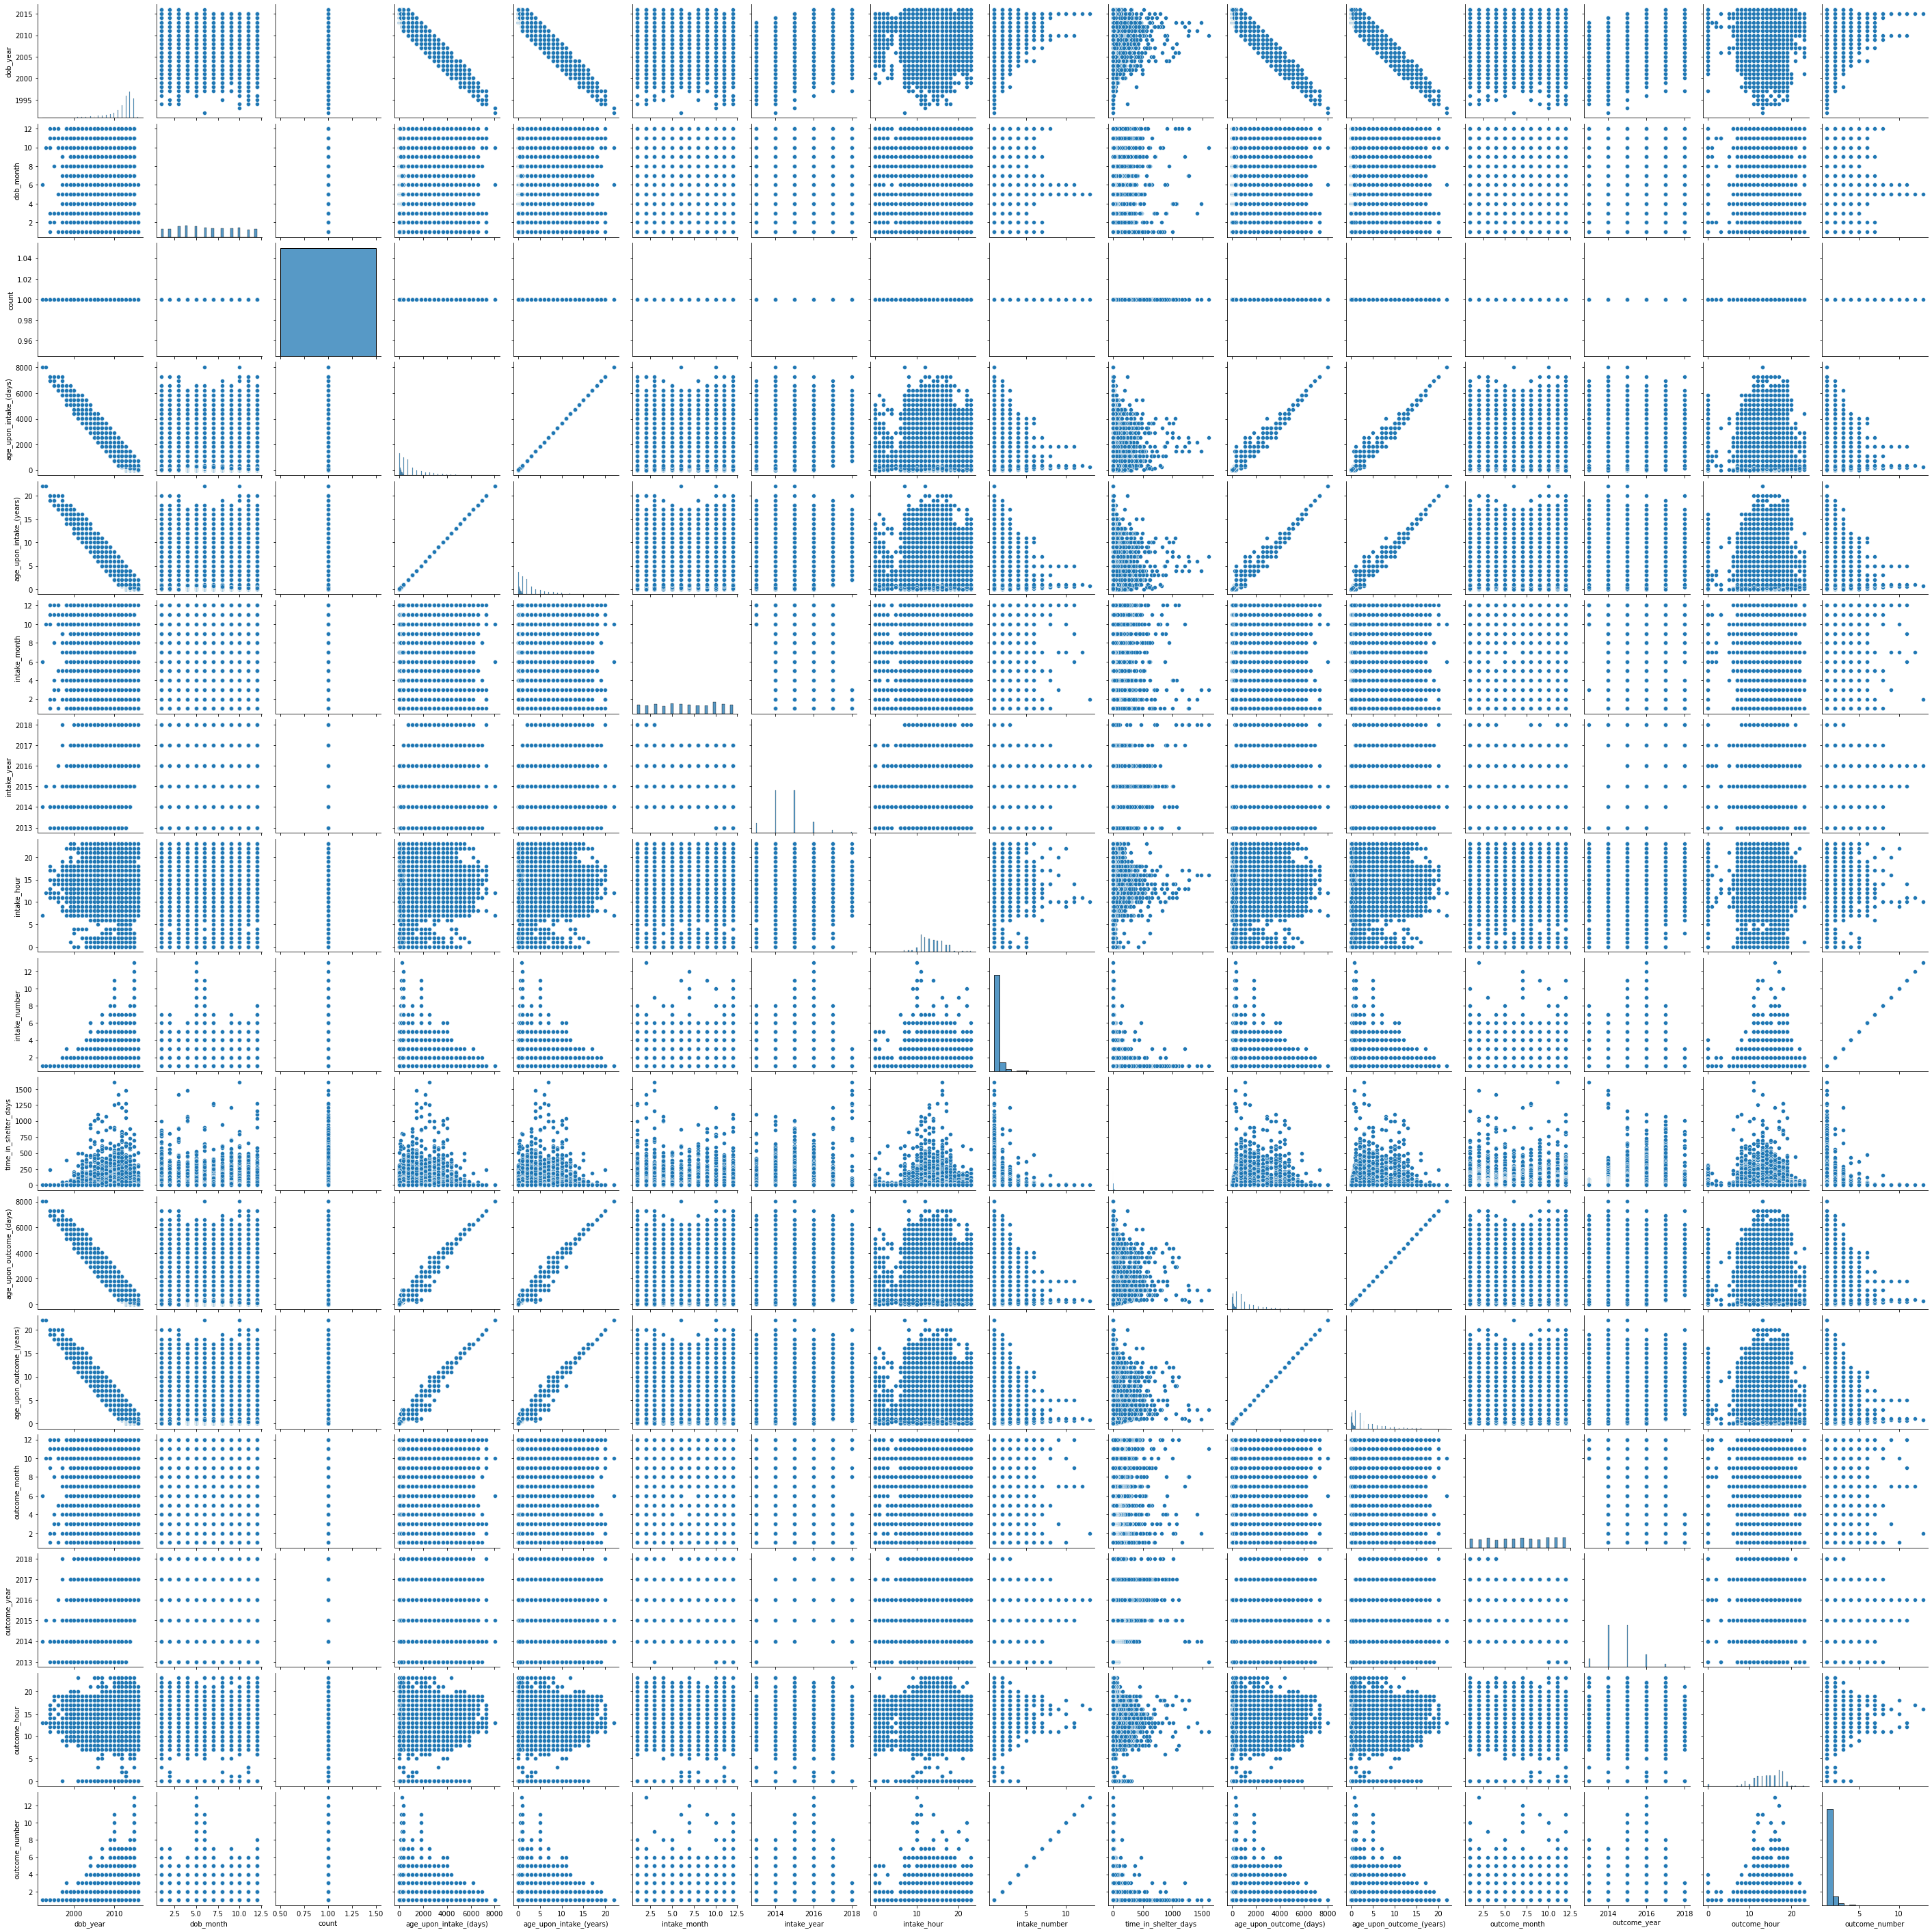

In [19]:
sns.pairplot(df)

<AxesSubplot:>

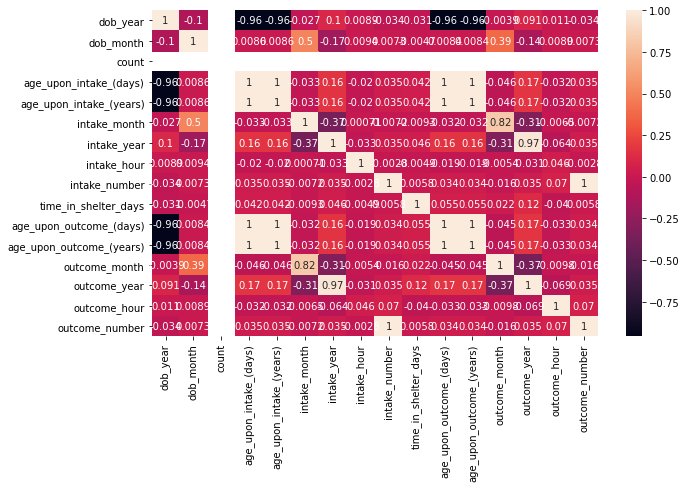

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

# Dealing with categorical value

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['outcome_type'] = label.fit_transform(df['outcome_type'])

In [22]:
df=pd.get_dummies(df, columns = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake','sex_upon_outcome'],drop_first=True)

In [23]:
df.columns

Index(['dob_year', 'dob_month', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'intake_month', 'intake_year', 'intake_hour',
       'intake_number', 'time_in_shelter_days', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'outcome_month', 'outcome_year',
       'outcome_hour', 'outcome_number', 'outcome_type', 'animal_type_Cat',
       'animal_type_Dog', 'animal_type_Other', 'intake_condition_Feral',
       'intake_condition_Injured', 'intake_condition_Normal',
       'intake_condition_Nursing', 'intake_condition_Other',
       'intake_condition_Pregnant', 'intake_condition_Sick',
       'intake_type_Owner Surrender', 'intake_type_Public Assist',
       'intake_type_Stray', 'intake_type_Wildlife',
       'sex_upon_intake_Intact Male', 'sex_upon_intake_Neutered Male',
       'sex_upon_intake_Spayed Female', 'sex_upon_intake_Unknown',
       'sex_upon_outcome_Intact Male', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female', 'sex_u

In [24]:
df.shape

(47802, 39)

In [25]:
y=df.pop('outcome_type')#target

In [26]:
X=df

In [27]:
y.unique() #label encoding 

array([6, 4, 8, 0, 3, 7, 5, 1, 2])

In [28]:
y.value_counts()

0    12967
8    10345
6     9717
3     4144
1     2829
4     2599
5     2573
7     2450
2      178
Name: outcome_type, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split



# split into train and test
#There is a possibilty that there is a imbalance when we split  train and test ,the either dataset may have bias towards single category
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

# Hyperparameter Tuning

dTree = DecisionTreeClassifier()
bgcl = BaggingClassifier()
rfcl = RandomForestClassifier()
abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
gbcl = GradientBoostingClassifier()
xg = xgb.XGBClassifier()
#cb = CatBoostClassifier()
#lg = LGBMClassifier ()

ensemble_clf=[dTree,bgcl,rfcl,abcl,gbcl] 

param1={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
param2={"n_estimators" :[100, 300, 500, 800, 1200],"max_samples":range(10,300,5)}
param3={"n_estimators":[100, 300, 500, 800, 1200],"max_depth":range(5,30,5),"min_samples_split":range(1,100,5),"min_samples_leaf":[1, 2, 5, 10]}
param4={'base_estimator__max_depth':[i for i in range(2,11,2)],'base_estimator__min_samples_leaf':[5,10],'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1]}
param5={'min_samples_split':range(200,1001,200),'min_samples_leaf':range(30,71,10),'max_depth':range(5,30,5),'learning_rate':[0.01,0.1,0.8,0.003,0.04]}
#param6={'learning_rate':[0.1,0.8,0.01,0.03],'max_depth':range(5,16,2),'min_child_weight':range(1,6,2),'gamma':[0.1,0.5,0.01]}
#param7={'learning_rate': [0.03, 0.1,0.2,0.5],'depth':range(5,16,2),'l2_leaf_reg': range(1,20,2)}
#param8={'learning_rate': [0.03,0.5,0.1,0.01],'max_depth':range(5,20,5),'num_leaves': range(1,30,2)}
param=[param1,param2,param3,param4,param5]
model_log=["_dTree", "_bgcl", "_rfcl", "_abcl","_gbcl"]

In [30]:
rfcl = RandomForestClassifier()

In [31]:
param={"n_estimators":[100,200,300],"max_depth":range(0,30,5),"min_samples_split":range(0,50,5),"min_samples_leaf":range(3,50,3)}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
ran=RandomizedSearchCV(rfcl, param)
ran.fit(X_train, y_train)
    

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(0, 30, 5),
                                        'min_samples_leaf': range(3, 50, 3),
                                        'min_samples_split': range(0, 50, 5),
                                        'n_estimators': [100, 200, 300]})

In [34]:
print(ran.best_params_) 
print(ran.best_score_)

{'n_estimators': 200, 'min_samples_split': 45, 'min_samples_leaf': 9, 'max_depth': 25}
0.6150206346879374


In [35]:
rfcl1 = RandomForestClassifier(n_estimators= 100, min_samples_split=10, min_samples_leaf= 6,max_depth= 20)

In [36]:
rf=rfcl1.fit(X_train, y_train)

In [37]:
y_pred=rf.predict(X_val)

In [38]:
f1_score(y_val, y_pred, average='micro')

0.6279677857964648

<AxesSubplot:>

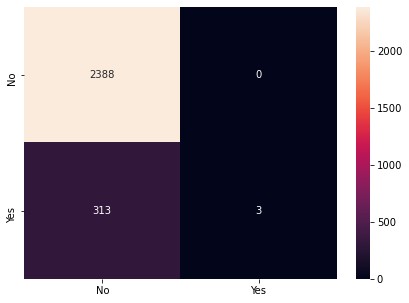

In [39]:
cm=confusion_matrix(y_val, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [61]:
columns=[ 'dob_year', 'dob_month','animal_type', 'intake_condition', 'intake_type','sex_upon_intake', 'count', 'age_upon_intake_(days)','age_upon_intake_(years)','intake_month', 'intake_year', 'intake_hour', 'intake_number', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(days)','age_upon_outcome_(years)','outcome_month', 'outcome_year', 'outcome_hour','outcome_number']

In [62]:
 df1=X_test.loc[:, columns]

In [63]:
df1=pd.get_dummies(df1,columns = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake','sex_upon_outcome'],drop_first=True)

In [64]:
y=rf.predict(df1)

In [65]:
y_test=pd.DataFrame(data=y,columns=['outcome_type'])

In [71]:
col=['animal_id_outcome','outcome_type']

In [81]:
y_test=label.inverse_transform(y_test)

In [84]:
y_test1=pd.DataFrame(data=y_test,columns=['outcome_type'])

In [85]:
output=y_test1.join(X_test['animal_id_outcome'])

In [86]:
output=output[col]

In [87]:
output.head(10)

,animal_id_outcome,outcome_type
0,A723133,Transfer
1,A723134,Adoption
2,A723135,Adoption
3,A723136,Missing
4,A723137,Missing
5,A723138,Return to Owner
6,A723139,Transfer
7,A723140,Adoption
8,A723141,Adoption
9,A723142,Transfer


In [88]:
output.to_csv('output_ZS.csv', header=True, index=False)